# Classifying Fashion-MNIST

[Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), Fashion-MNIST是一套28x28灰度图像的衣服。它比MNIST更复杂，因此它可以更好地表示网络的实际性能，并更好地表示您将在现实世界中使用的数据集。

<img src='assets/fashion-mnist-sprite.png' width=500px>

各种衣服那么多~

In [ ]:
from keras.datasets import fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [2]:
import matplotlib.pyplot as plt
def imshow(image, ax=None, title=None, normalize=True):
    fig = plt.figure(figsize = (3,3),dpi=300) 
    ax = fig.add_subplot(111)
    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image,cmap='gray')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

Here we can see one of the images.

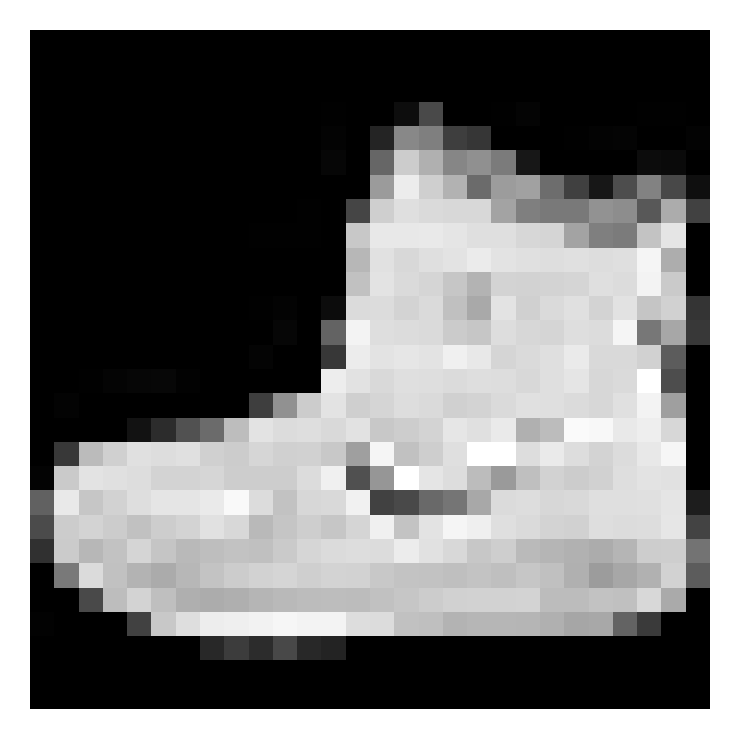

In [4]:
# trainloader 是一个gennerater ，我们要读取它的信息，我们就要iter 它出来
# 前图，后对应的label 
image, label = x_train[0],y_train[0]

#使用helper的 imshow 功能读取，我们的第一张图片，这是一件xx！
imshow(image,normalize=None);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

net = Sequential()
net.add(Flatten(input_shape = (28,28)))
net.add(Dense(512,activation = 'relu'))
net.add(Dense(256,activation = 'relu'))
net.add(Dense(64,activation = 'relu'))
net.add(Dense(10,activation = 'softmax'))
net.summary()
        
        

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 550,346
Trainable params: 550,346
Non-trainable params: 0
_________________________________________________________________


# Train the network

我们把网络搭建好了，剩下的首先是要去定义我们的loss function [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( 我们这是一个Multi-classification Problem  `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (优化器的意思是我们调整parameter的方式 `optim.SGD` or `optim.Adam`).


In [6]:
net.compile(loss= 'categorical_crossentropy', optimizer = 'adam',metrics = ['accuracy'])

In [7]:
import keras
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [10]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='fashionmlp.weights.best.hdf5', verbose=1, 
                               save_best_only=True)

hist = net.fit(x_train, y_train, batch_size=64, epochs=50,
          validation_split=0.2, callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
 - 7s - loss: 0.5192 - acc: 0.8146 - val_loss: 0.4005 - val_acc: 0.8512

Epoch 00001: val_loss improved from inf to 0.40053, saving model to fashionmlp.weights.best.hdf5
Epoch 2/50
 - 6s - loss: 0.3600 - acc: 0.8684 - val_loss: 0.3578 - val_acc: 0.8698

Epoch 00002: val_loss improved from 0.40053 to 0.35780, saving model to fashionmlp.weights.best.hdf5
Epoch 3/50
 - 7s - loss: 0.3248 - acc: 0.8802 - val_loss: 0.3430 - val_acc: 0.8772

Epoch 00003: val_loss improved from 0.35780 to 0.34295, saving model to fashionmlp.weights.best.hdf5
Epoch 4/50
 - 7s - loss: 0.2998 - acc: 0.8897 - val_loss: 0.3345 - val_acc: 0.8782

Epoch 00004: val_loss improved from 0.34295 to 0.33454, saving model to fashionmlp.weights.best.hdf5
Epoch 5/50
 - 7s - loss: 0.2832 - acc: 0.8940 - val_loss: 0.3274 - val_acc: 0.8847

Epoch 00005: val_loss improved from 0.33454 to 0.32743, saving model to fashionmlp.weights.best.hdf5
Epoch 6/50
 - 7s - loss: 0.26

### 我们可以看到Loss 在不断地下降，我们的神经网络确实在不断地进步！

Ankle boot
Ankle boot


(0, 1.1)

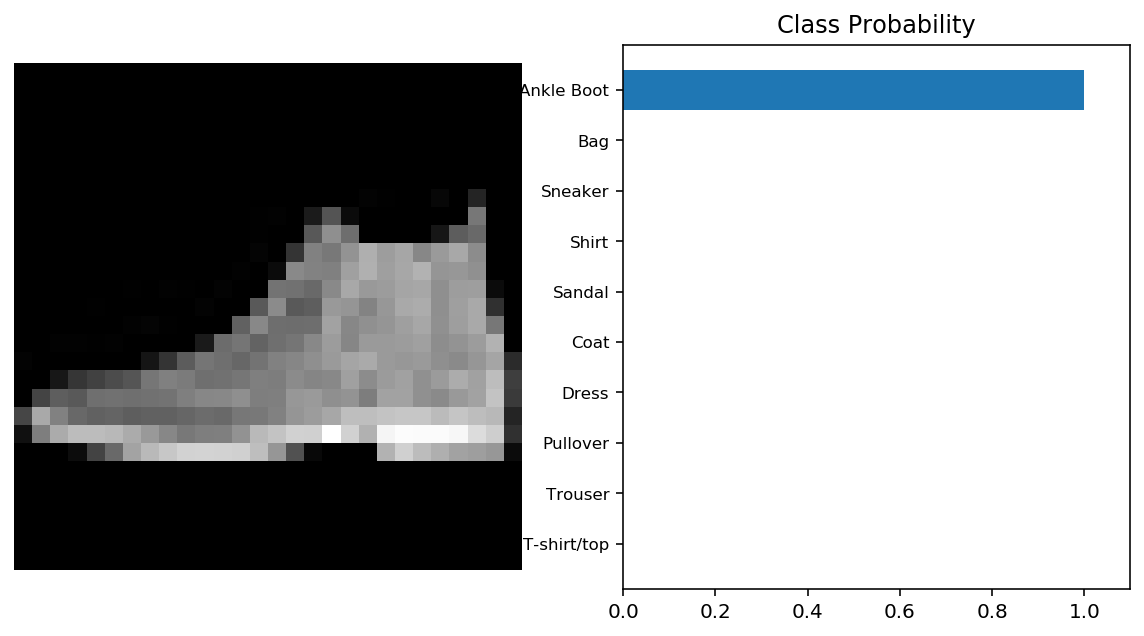

In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Test out your network!

y_hat = net.predict_on_batch(x_test)

img = x_test[0]

classes = ['T-shirt/top', 'Trouser', 'Pullover','Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag','Ankle boot']

print(classes[np.argmax(y_test[0],axis=0)])
pred = np.argmax(y_hat[0],axis=0)
print(classes[pred])

fig,(ax1,ax2) = plt.subplots(figsize = (10,5),ncols = 2)
ax1.imshow(img,cmap='gray')
ax1.axis('off')
ax2.barh(np.arange(10),y_hat[0])
ax2.set_yticks(np.arange(10))
ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small')
ax2.set_title('Class Probability')
ax2.set_xlim(0, 1.1)

## Actually it is a Ankle boot!

### 可视化的结果如上

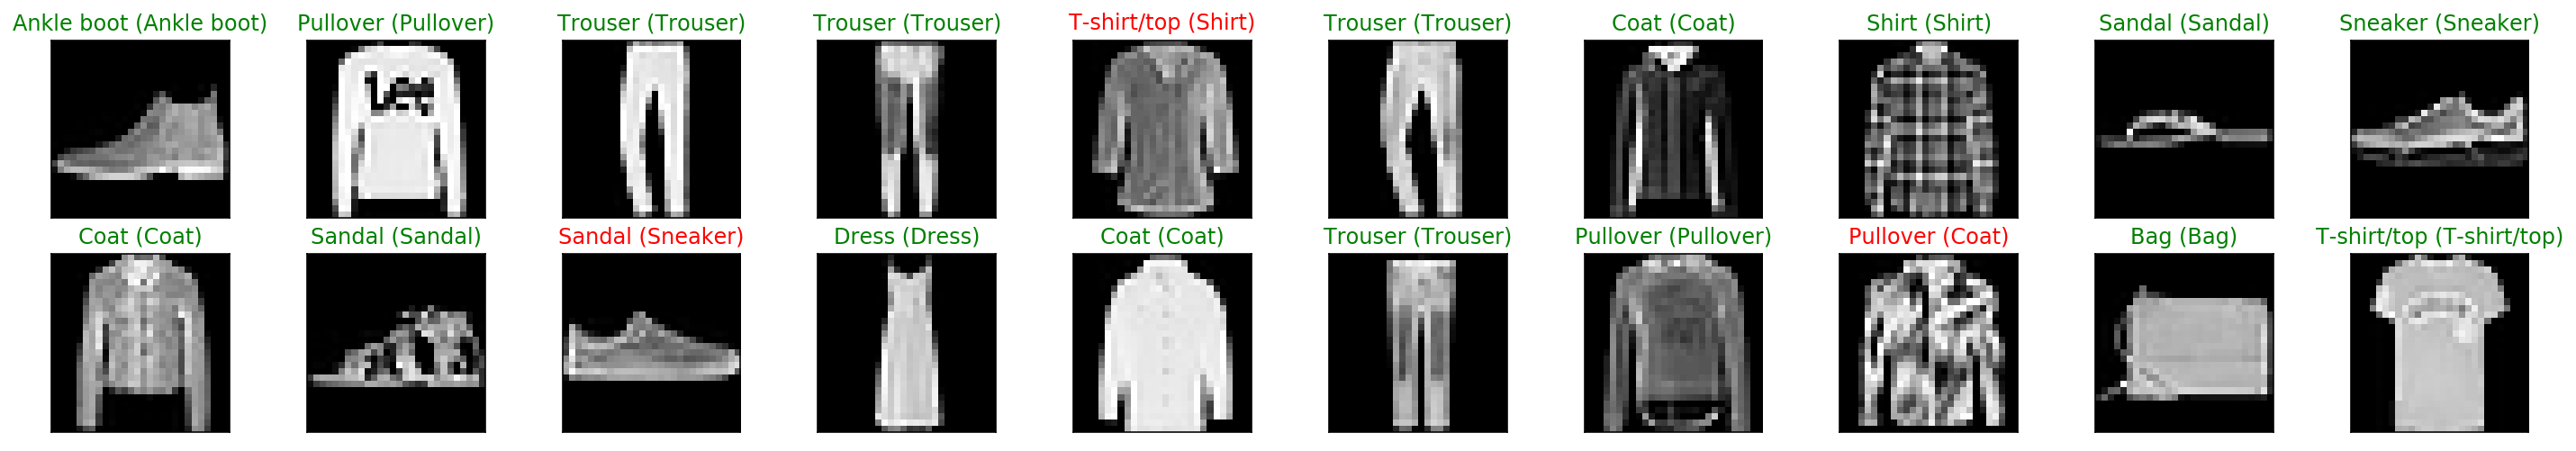

In [12]:
#结果可视化！
import matplotlib.pyplot as plt

# 使用model 做出predict
preds = net.predict_classes(x_test[:20])

images = x_test[:20]
labels = np.argmax(y_test[:20],axis=1)


fig = plt.figure(figsize=(25, 4))
for idx in range(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(images[idx],cmap = 'gray')
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))
    
## 一张张打印出来，然后看看结果